In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
Circuit = QuantumCircuit(2)

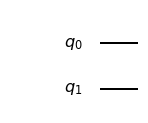

In [3]:
Circuit.draw('mpl')

In [4]:
Circuit.h(0)
Circuit.h(1)


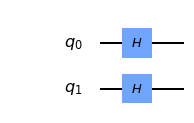

In [5]:
Circuit.draw('mpl')

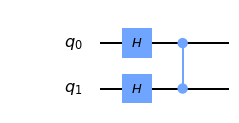

In [6]:
#apply Oracle U_f
Circuit.cz(0,1)
Circuit.draw('mpl')

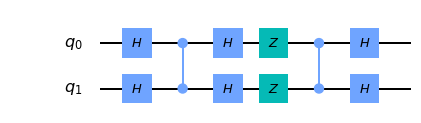

In [7]:
#apply diffuser U_S
Circuit.h(0)
Circuit.h(1)
Circuit.z(0)
Circuit.z(1)
Circuit.cz(0,1)
Circuit.h(0)
Circuit.h(1)
Circuit.draw('mpl')


In [8]:
sv_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(Circuit, sv_sim)
statevec = job_sim.result().get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

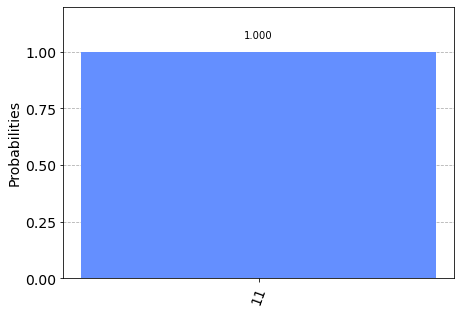

In [9]:
Circuit.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1-24
results = execute(Circuit, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)